# Clustering e Classificazione

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder

In [2]:
df = pd.read_csv('df')

FileNotFoundError: [Errno 2] No such file or directory: 'df'

### Encoding delle features

In [ ]:
scaler = MinMaxScaler()
num_cols = df.select_dtypes('number').columns
num_data = df[num_cols].copy()
scaled_num_cols = scaler.fit_transform(num_data)

In [ ]:
scaled_df = pd.DataFrame(scaled_num_cols, columns=num_cols)

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
cat_cols = df.select_dtypes('object').columns
cat_data = df[cat_cols].copy()
encoded_cat_cols = encoder.fit_transform(cat_data)
feature_names = encoder.get_feature_names_out(cat_cols)

In [ ]:
encoded_df = pd.DataFrame(encoded_cat_cols, columns=feature_names, index=df.index)

In [ ]:
final_df = pd.concat([scaled_df, encoded_df], axis = 1)

## Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Checking different scores for different amount of clusters to find
def kmeans_optimization(data, max_k):

    # Initializing three lists: one to check the k that is being analyzed, the other to collect the niertias and silhouettes for each iteration
    ks = []
    inertias = []
    sil_scores = []

    best_sil = -1
    best_k = 0

    for k in range(2, max_k+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=16000)
        kmeans.fit_predict(data)

        ks.append(k)
        inertias.append(kmeans.inertia_)
        sil_score = silhouette_score(data, kmeans.labels_)
        sil_scores.append(sil_score)
        if sil_score > best_sil:
            best_sil = sil_score
            best_k = k

    # Genero il plot per inertia
    fig = plt.subplots(figsize = (10,5))
    plt.plot(ks, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia (SSE)')
    plt.grid(True)
    plt.show()

    # Genero il plot per la silhouette
    fig = plt.subplots(figsize = (10,5))
    plt.plot(ks, sil_scores, 'o-', color = 'orange')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.grid(True)
    plt.show()

    print(f'The best silhouette score was {best_sil} with a k of {best_k}')

In [ ]:
kmeans_optimization(final_df, 15)

KeyboardInterrupt: 

In [ ]:
kmeans = KMeans(n_clusters=12, random_state=42)
labels = kmeans.fit_predict(final_df)
final_df['cluster_label'] = labels

C:\Users\cinna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualizzazione

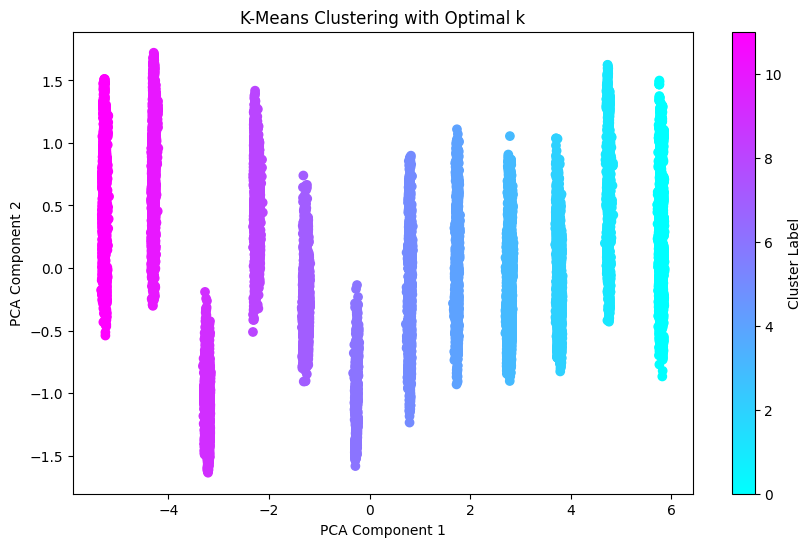

In [ ]:
pca = PCA(n_components=2, random_state=42)
pca_df = pca.fit_transform(final_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering with Optimal k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Si utilizza per la variabile target
lab_encoder = LabelEncoder()
df['final_result'] = lab_encoder.fit_transform(df['final_result'])

In [ ]:
svc = SVC(C= 1, kernel='rbf')
dt = DecisionTreeClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
logistic = LogisticRegression(C = 1, solver = 'lbfgs')
dummy = GaussianNB()

In [ ]:
# Divisione train/test
X = final_df.drop(columns= ['final_result_Fail', 'final_result_Pass',
       'final_result_Withdrawn'])
y = df['final_result']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
models = {
    'SVM': svc,
    'Logistic Regression': logistic,
    'KNN': knn,
    'GaussianNB': dummy,
    'Decision Tree': dt,
    'Random Forest': rfc,
    'GradientBoost': gbc
}

In [ ]:
train_accuracies = {}
test_accuracies = {}

train_f1s = {}
test_f1s = {}

In [ ]:
for name, model in models.items():
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    train_accuracies[f'{name}'] = train_accuracy
    test_accuracies[f'{name}'] = test_accuracy

    train_f1s[f'{name}'] = train_f1
    test_f1s[f'{name}'] = test_f1

    print(name)
    print('Classification Report for train')
    print(classification_report(y_train, y_train_pred))
    print('Classification Report for test')
    print(classification_report(y_test, y_test_pred))

    print('*'*50)


SVM
Classification Report for train
              precision    recall  f1-score   support

           0       0.94      0.16      0.28      1937
           1       0.65      0.57      0.61      3777
           2       0.70      0.96      0.81      8146
           3       0.79      0.45      0.57      2480

    accuracy                           0.70     16340
   macro avg       0.77      0.54      0.57     16340
weighted avg       0.73      0.70      0.66     16340

Classification Report for test
              precision    recall  f1-score   support

           0       0.66      0.07      0.12       830
           1       0.52      0.45      0.48      1619
           2       0.66      0.94      0.77      3492
           3       0.66      0.35      0.45      1063

    accuracy                           0.63      7004
   macro avg       0.62      0.45      0.46      7004
weighted avg       0.63      0.63      0.58      7004

**************************************************


C:\Users\cinna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Classification Report for train
              precision    recall  f1-score   support

           0       0.68      0.34      0.45      1937
           1       0.56      0.46      0.50      3777
           2       0.70      0.90      0.79      8146
           3       0.63      0.48      0.54      2480

    accuracy                           0.67     16340
   macro avg       0.64      0.54      0.57     16340
weighted avg       0.66      0.67      0.65     16340

Classification Report for test
              precision    recall  f1-score   support

           0       0.64      0.32      0.43       830
           1       0.53      0.44      0.48      1619
           2       0.69      0.89      0.78      3492
           3       0.63      0.45      0.53      1063

    accuracy                           0.65      7004
   macro avg       0.62      0.52      0.55      7004
weighted avg       0.64      0.65      0.63      7004

***********************************************

In [ ]:
results_df = pd.DataFrame({
    'Model': list(train_accuracies.keys()),
    'Train Accuracy': list(train_accuracies.values()),
    'Test Accuracy': list(test_accuracies.values()),
    'Train F1score': list(train_f1s.values()),
    'Test F1score': list(test_f1s.values())
})

In [ ]:
results_df = results_df.sort_values(by='Test F1score', ascending=False)
results_df

,Model,Train Accuracy,Test Accuracy,Train F1score,Test F1score
6,GradientBoost,0.730171,0.701314,0.717956,0.688206
5,Random Forest,1.000000,0.680040,1.000000,0.661748
1,Logistic Regression,0.666279,0.652056,0.645615,0.629994
4,Decision Tree,1.000000,0.604797,1.000000,0.606247
0,SVM,0.700061,0.630640,0.663488,0.579989
2,KNN,0.682925,0.540548,0.665858,0.516686
3,GaussianNB,0.261628,0.255711,0.160774,0.155917


### Testing sui modelli migliori

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
gboost_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators' : [10, 100, 1000],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 3, 5, 10],
    'max_depth': [None, 3, 5, 10], 
    'ccp_alpha': [0, 1, ] 

}

grid_gboost = GridSearchCV(GradientBoostingClassifier(),
                                 gboost_params,
                                 cv = 5,
                                 scoring = 'accuracy',
                                 n_jobs=-1,
                                verbose=1 )

grid_gboost.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': [0, 1],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': [2, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 1000]},
                   scoring='accuracy', verbose=1)

In [ ]:
gb_model = GradientBoostingClassifier(**grid_gboost.best_params_, random_state=42)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0, learning_rate=0.2, max_depth=5,
                           min_samples_leaf=5, min_samples_split=5,
                           random_state=42)

In [ ]:
model_path = "C:\\Users\\cinna\\OneDrive\\"

In [ ]:
import joblib
joblib.dump(
    gb_model,
    model_path + 'gb_seminario'+ '.pkl'
)

['C:\\Users\\cinna\\OneDrive\\gb_seminario.pkl']

In [ ]:
y_pred_gb = gb_model.predict(x_test)
print('Classification Report per Gradient Boosting Classifier')
classification_report(y_test, y_pred_gb)
print(f'Accuracy del GBClassifier: {accuracy_score(y_test, y_pred_gb)}')
print(f'F1 Score del GBClassifier: {f1_score(y_test, y_pred_gb, average="weighted")}')

Classification Report per Gradient Boosting Classifier
Accuracy del GBClassifier: 0.6974585950885208
F1 Score del GBClassifier: 0.6867792749889426


In [ ]:
rf_params = {
    'n_estimators': [10,100],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

grid_rf = GridSearchCV(rfc, 
                             rf_params, 
                             cv = 5, 
                             scoring='accuracy',
                             n_jobs=-1, 
                             verbose = 1)

grid_rf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100]},
                   scoring='accuracy', verbose=1)

In [ ]:
random_forest = RandomForestClassifier(**grid_rf.best_params_)
random_forest.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=10)

In [ ]:
y_pred_rf = random_forest.predict(x_test)
print('Classification Report per Random Forest Classifier')
classification_report(y_test, y_pred_rf)
print(f'Accuracy del Random Forest Classifier: {accuracy_score(y_test, y_pred_rf)}')
print(f'F1 Score del Random Forest Classifier: {f1_score(y_test, y_pred_rf, average="weighted")}')

Classification Report per Random Forest Classifier
Accuracy del Random Forest Classifier: 0.6890348372358652
F1 Score del Random Forest Classifier: 0.6693444932731021
